<a href="https://colab.research.google.com/github/dsk-yshkw/DataDrivenFinance/blob/main/ch04_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 最初にpandasをインポートしておく
import pandas as pd

# CSVからのデータ取得

In [2]:
# GitHubからダウンロードしたzipファイルを展開し，そのままローカルで使う場合
df_price = pd.read_csv("/workspace/ch04_stock_price.csv",index_col = 'Date') # ファイルパスは環境ごとに設定
df_interest_rate= pd.read_csv("/workspace/ch04_interest_rate.csv",index_col = 'Date') # ファイルパスは環境ごとに 設定

# Google Colabを使用し，sample_dataフォルダにcsvファイルを置いた場合
#df_price = pd.read_csv("sample_data/ch04_stock_price.csv",index_col = 'Date')
#df_interest_rate= pd.read_csv("sample_data/ch04_interest_rate.csv",index_col = 'Date')

# Google ColabとGoogle Driveを併用し，MyDrive/Colab Notebooks 下に作ったサブフォルダ(Kyoritsu)にcsvファイルを置いた場合
#df_price = pd.read_csv("drive/MyDrive/Colab Notebooks/Kyoritsu/ch04_stock_price.csv",index_col = 'Date')
#df_interest_rate= pd.read_csv("drive/MyDrive/Colab Notebooks/Kyoritsu/ch04_interest_rate.csv",index_col = 'Date')

#df_price


In [3]:
df_price

,SP500,MCD
Date,,
2016-06-06,2109.409912,107.549301
2016-06-07,2112.129883,107.461159
2016-06-08,2119.120117,107.646301
2016-06-09,2115.479980,108.245735
2016-06-10,2096.070068,107.866676
...,...,...
2021-05-27,4200.879883,233.570007
2021-05-28,4204.109863,233.889999
2021-06-01,4202.040039,233.240005


## データの整理

In [4]:
df_rate = df_price.pct_change()
df_rate

,SP500,MCD
Date,,
2016-06-06,NaN,NaN
2016-06-07,0.001289,-0.000820
2016-06-08,0.003310,0.001723
2016-06-09,-0.001718,0.005569
2016-06-10,-0.009175,-0.003502
...,...,...
2021-05-27,0.001165,0.010803
2021-05-28,0.000769,0.001370
2021-06-01,-0.000492,-0.002779


In [5]:
df_rate = pd.concat([df_rate,df_interest_rate['Adj Close']],axis = 1,join = 'inner')
df_rate.columns = ['SP500','MCD','^TNX']
df_rate


,SP500,MCD,^TNX
Date,,,
2016-06-06,NaN,NaN,1.723
2016-06-07,0.001289,-0.000820,1.713
2016-06-08,0.003310,0.001723,1.706
2016-06-09,-0.001718,0.005569,1.680
2016-06-10,-0.009175,-0.003502,1.639
...,...,...,...
2021-05-27,0.001165,0.010803,1.610
2021-05-28,0.000769,0.001370,1.581
2021-06-01,-0.000492,-0.002779,1.615


In [6]:
df_rp = pd.DataFrame() # rp = risk premia
df_rp['SP500'] = df_rate['SP500'] - df_rate['^TNX']*0.01/255
df_rp['MCD'] = df_rate['MCD'] - df_rate['^TNX']*0.01/255
df_rp

,SP500,MCD
Date,,
2016-06-06,NaN,NaN
2016-06-07,0.001222,-0.000887
2016-06-08,0.003243,0.001656
2016-06-09,-0.001784,0.005503
2016-06-10,-0.009239,-0.003566
...,...,...
2021-05-27,0.001102,0.010740
2021-05-28,0.000707,0.001308
2021-06-01,-0.000556,-0.002842


In [7]:
df_rp = df_rp.dropna()
df_rp

,SP500,MCD
Date,,
2016-06-07,0.001222,-0.000887
2016-06-08,0.003243,0.001656
2016-06-09,-0.001784,0.005503
2016-06-10,-0.009239,-0.003566
2016-06-13,-0.008179,0.005085
...,...,...
2021-05-27,0.001102,0.010740
2021-05-28,0.000707,0.001308
2021-06-01,-0.000556,-0.002842


Text(0, 0.5, 'MCD')

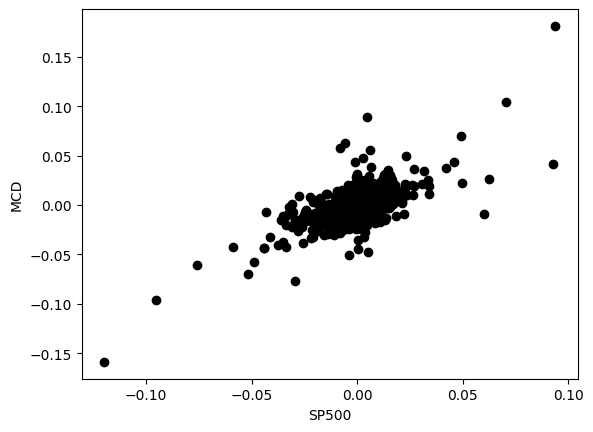

In [8]:
import matplotlib.pyplot as plt


plt.scatter(df_rp['SP500'],df_rp['MCD'],color='black')
plt.xlabel('SP500')
plt.ylabel('MCD')

In [9]:
from sklearn.model_selection import train_test_split

val_size = 0.2

df_train,df_val = train_test_split(df_rp,test_size = val_size,shuffle = False)

In [12]:
X_train = df_train.sort_values('SP500')['SP500']
X_val = df_val.sort_values('SP500')['SP500']

y_train = df_train.sort_values('SP500')['MCD']
y_val = df_val.sort_values('SP500')['MCD']

### パラメータ推定

In [20]:
from sklearn import linear_model

In [21]:
reg = linear_model.LinearRegression()

In [22]:
reg.fit(X_train.values.reshape(-1,1),y_train.values)
pred_train_1 = reg.predict(X_train.values.reshape(-1,1))

In [23]:
print(reg.intercept_)
print(reg.coef_)


0.00026777831694420584
[0.82544637]


In [24]:
reg_0 = linear_model.LinearRegression(fit_intercept = False)
reg_0.fit(X_train.values.reshape(-1,1),y_train)
pred_train_0 = reg_0.predict(X_train.values.reshape(-1,1))

In [25]:
print(reg_0.intercept_)
print(reg_0.coef_)

0.0
[0.8261595]


Text(0, 0.5, 'MCD')

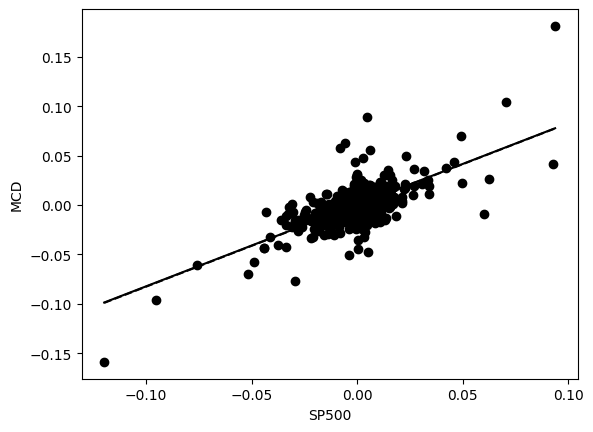

In [26]:
plt.plot(X_train,pred_train_1,color='black')
plt.plot(X_train,pred_train_0,color='black',linestyle='dashed')
plt.scatter(X_train,y_train,color='black')
plt.xlabel('SP500')
plt.ylabel("MCD")

In [27]:
from sklearn.metrics import mean_squared_error

MSE0 = mean_squared_error(pred_train_0,y_train)
MSE1 = mean_squared_error(pred_train_1,y_train)

print(MSE0)
print(MSE1)


0.0001307262339236507
0.00013065460681415818


In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
poly = PolynomialFeatures(degree = 5)

In [31]:
import numpy as np

X_example = np.array([0,1,2,3])
X_example = X_example.reshape(-1,1)
poly.fit_transform(X_example)

array([[  1.,   0.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

In [32]:
X_train_poly = poly.fit_transform(X_train.values.reshape(-1,1))
poly_reg = linear_model.LinearRegression().fit(X_train_poly,y_train.values)

In [33]:
print(poly_reg.intercept_)
print(poly_reg.coef_)

0.0005591747261244883
[ 0.00000000e+00  5.96703298e-01 -2.09378185e+00  4.80747082e+01
  3.39018082e+02  1.71746614e+03]


Text(0, 0.5, 'MCD')

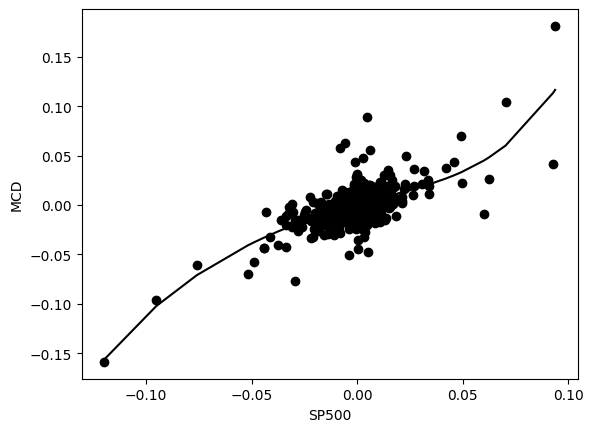

In [34]:
pred_train_5 = poly_reg.predict(X_train_poly)
plt.scatter(X_train.values,y_train.values,color='black')
plt.plot(X_train.values,pred_train_5,color='black')
plt.xlabel('SP500')
plt.ylabel("MCD")

In [35]:
MSE5 = mean_squared_error(pred_train_5,y_train)
print(MSE5)

0.00012051143117314138


In [36]:
degrees = [1,2,3,4,5,10,15,20,25]
MSE_train = np.empty(0)
for degree in degrees:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train.values.reshape(-1,1))
    poly_reg = linear_model.LinearRegression().fit(X_train_poly,y_train)
    pred_train = poly_reg.predict(X_train_poly)
    MSE = mean_squared_error(pred_train,y_train)
    MSE_train = np.append(MSE_train,MSE)
    print('degree = ',degree,' MSE = ',MSE)

degree =  1  MSE =  0.00013065460681415818
degree =  2  MSE =  0.0001302424714407842
degree =  3  MSE =  0.0001210581489243355
degree =  4  MSE =  0.00012057376646830111
degree =  5  MSE =  0.00012051143117314138
degree =  10  MSE =  0.00011846611257529978
degree =  15  MSE =  0.00010771558782348862
degree =  20  MSE =  0.0001077155878054413
degree =  25  MSE =  0.00010771774749275557


### 検証

#### ホールドアウト検証 

In [ ]:
MSE_val = np.empty(0)
for degree in degrees:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train.values.reshape(-1,1))
    X_val_poly = poly.fit_transform(X_val.values.reshape(-1,1))
    poly_reg = linear_model.LinearRegression().fit(X_train_poly,y_train.values)
    pred_val = poly_reg.predict(X_val_poly)
    MSE = mean_squared_error(pred_val,y_val.values)
    MSE_val = np.append(MSE_val,MSE)

    print('degree = ',degree,' MSE = ',MSE)    

degree =  1  MSE =  9.052477144726646e-05
degree =  2  MSE =  9.0451310889978e-05
degree =  3  MSE =  8.383270165654277e-05
degree =  4  MSE =  8.383417867618403e-05
degree =  5  MSE =  8.38491573400118e-05
degree =  10  MSE =  8.649482737020424e-05
degree =  15  MSE =  0.00011416877699587755
degree =  20  MSE =  0.00011416878217285048
degree =  25  MSE =  0.00011419070215728996


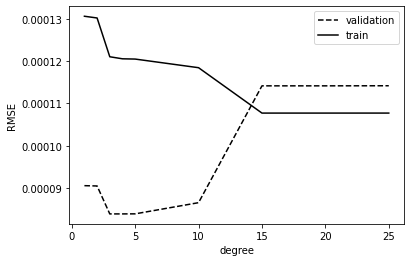

In [ ]:
plt.plot(degrees,MSE_val,color='black',linestyle = 'dashed',label='validation')
plt.plot(degrees,MSE_train,color='black',linestyle = 'solid',label = 'train')
plt.xlabel('degree')
plt.ylabel("RMSE")
plt.legend(loc = 'best')

#### 交差検証とウォーク・フォワード 

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits = 5)

for degree in degrees:
    MSE_train = np.empty(0)
    MSE_val = np.empty(0)
    for train, val in tscv.split(df_rp):
        X_train_cross = df_rp.iloc[train]['SP500']
        y_train_cross = df_rp.iloc[train]['MCD']
        X_val_cross = df_rp.iloc[val]['SP500']
        y_val_cross = df_rp.iloc[val]['MCD']
    
        poly = PolynomialFeatures(degree = degree)
        X_train_poly = poly.fit_transform(X_train_cross.values.reshape(-1,1))
        X_val_poly = poly.fit_transform(X_val_cross.values.reshape(-1,1))
        poly_reg = linear_model.LinearRegression().fit(X_train_poly,y_train_cross)
        pred_train = poly_reg.predict(X_train_poly)
        pred_val = poly_reg.predict(X_val_poly)
        MSE_train = np.append(MSE_train,mean_squared_error(pred_train,y_train_cross))
        MSE_val = np.append(MSE_val,mean_squared_error(pred_val,y_val_cross))
        
    print('degree ',degree, 'MSE train', MSE_train.mean(), 'MSE val', MSE_val.mean())
        

degree  1 MSE train 8.60197736710908e-05 MSE val 0.00015229167788522314
degree  2 MSE train 8.592147964884063e-05 MSE val 0.00015162795193958187
degree  3 MSE train 8.411899103495005e-05 MSE val 0.000134823905717988
degree  4 MSE train 8.383765487081447e-05 MSE val 0.0003172046092680442
degree  5 MSE train 8.369631096499638e-05 MSE val 0.0034452519702313027
degree  10 MSE train 8.249559734671821e-05 MSE val 2293746.494509938
degree  15 MSE train 8.089839586113066e-05 MSE val 2296068.608838444
degree  20 MSE train 8.089839592486812e-05 MSE val 2296068.608838986
degree  25 MSE train 8.090896233047916e-05 MSE val 2287265.0033197533


### 正則化 

In [ ]:
degree = 25
poly = PolynomialFeatures(degree = degree)
X_poly_train = poly.fit_transform(X_train.values.reshape(-1,1))
X_poly_val = poly.fit_transform(X_val.values.reshape(-1,1))
poly_reg = linear_model.LinearRegression().fit(X_poly_train,y_train)
pred = poly_reg.predict(X_poly_val)

poly_reg_Ridge = linear_model.Ridge(alpha = 0.0001).fit(X_poly_train,y_train)
pred_Ridge = poly_reg_Ridge.predict(X_poly_val)


In [ ]:
print('MSE for regression', mean_squared_error(pred,y_val))
print('MSE for Ridge regression', mean_squared_error(pred_Ridge,y_val))


MSE for regression 0.00011419070215728996
MSE for Ridge regression 9.012535937576375e-05


In [ ]:
poly_reg.coef_

array([ 1.17312853e+09,  3.86359147e-01, -2.08538393e+01,  1.32673240e+03,
        6.45983041e+04, -1.40090754e+06, -4.96622808e+07,  5.80563095e+08,
        1.39541309e+10, -9.40509926e+10, -1.63950920e+12,  5.06070563e+12,
        6.87807441e+13, -2.84957730e+12,  2.14167850e+12, -1.12103489e+11,
        4.32658051e+10, -2.73132372e+09,  7.31585739e+08, -5.38599017e+07,
        1.13474670e+07, -9.45723577e+05,  1.68494874e+05, -1.54831178e+04,
        2.44825949e+03, -2.42475643e+02])

In [ ]:
poly_reg_Ridge.coef_

array([ 0.00000000e+00,  8.13488916e-01, -6.88238862e-01,  1.58688029e+00,
       -4.53990904e-02,  1.90880046e-02, -9.60425283e-04,  2.35838872e-04,
       -1.65872969e-05,  3.04713568e-06, -2.62764455e-07,  4.07789889e-08,
       -3.98724887e-09,  5.59481643e-10, -5.91272239e-11,  7.80539701e-12,
       -8.65564443e-13,  1.10085940e-13, -1.25767237e-14,  1.56346618e-15,
       -1.81935198e-16,  2.23023624e-17, -2.62491404e-18,  3.19011867e-19,
       -3.78109243e-20,  4.57095336e-21])

### グリッドサーチ 

In [ ]:
degrees = [1,2,3,5,10,30,50,100,200]
alphas = [0.01,0.1,1,10,100]

tscv = TimeSeriesSplit(n_splits = 5)
min_MSE_val = np.Inf
opt_deg = degrees[0]
opt_alpha = alphas[0]

for degree in degrees:
    for alpha in alphas:
        MSE_train = np.empty(0)
        MSE_val = np.empty(0)
        for train, val in tscv.split(df_rp):
            X_train_cross = df_rp.iloc[train]['SP500']
            y_train_cross = df_rp.iloc[train]['MCD']
            X_val_cross = df_rp.iloc[val]['SP500']
            y_val_cross = df_rp.iloc[val]['MCD']
    
            poly = PolynomialFeatures(degree = degree)
            X_train_poly = poly.fit_transform(X_train_cross.values.reshape(-1,1))
            X_val_poly = poly.fit_transform(X_val_cross.values.reshape(-1,1))
            poly_reg_Ridge = linear_model.Ridge(alpha = alpha).fit(X_train_poly,y_train_cross)
            pred_train_Ridge = poly_reg_Ridge.predict(X_train_poly)
            pred_val_Ridge = poly_reg_Ridge.predict(X_val_poly)
            
            MSE_train = np.append(MSE_train,mean_squared_error(pred_train_Ridge,y_train_cross))
            MSE_val = np.append(MSE_val,mean_squared_error(pred_val_Ridge,y_val_cross))
        
        if min_MSE_val > MSE_val.mean():
            min_MSE_val = MSE_val.mean()
            opt_deg = degree
            opt_alpha = alpha
            
        print('degree ',degree, 'alpha ',alpha,'MSE train', MSE_train.mean(), 'MSE val', MSE_val.mean())
        print('optimal degree is ',opt_deg,' optimal alpha is ', opt_alpha, 'MSE val',min_MSE_val)

degree  1 alpha  0.01 MSE train 8.732224922023858e-05 MSE val 0.00016147234219877088
optimal degree is  1  optimal alpha is  0.01 MSE val 0.00016147234219877088
degree  1 alpha  0.1 MSE train 9.577414221819118e-05 MSE val 0.00020154719367731998
optimal degree is  1  optimal alpha is  0.01 MSE val 0.00016147234219877088
degree  1 alpha  1 MSE train 0.00011183422102605395 MSE val 0.0002355130938124457
optimal degree is  1  optimal alpha is  0.01 MSE val 0.00016147234219877088
degree  1 alpha  10 MSE train 0.00011717724611562996 MSE val 0.00024242600776802183
optimal degree is  1  optimal alpha is  0.01 MSE val 0.00016147234219877088
degree  1 alpha  100 MSE train 0.0001178323506346109 MSE val 0.0002432060469200019
optimal degree is  1  optimal alpha is  0.01 MSE val 0.00016147234219877088
degree  2 alpha  0.01 MSE train 8.731341071784016e-05 MSE val 0.00016145976881300883
optimal degree is  2  optimal alpha is  0.01 MSE val 0.00016145976881300883
degree  2 alpha  0.1 MSE train 9.57718956